# Ex15

In [1]:
import keras_ocr
import pytesseract
import os
import io
import cv2
from glob import glob
from PIL import Image, ImageDraw
from pytesseract import Output
from pytesseract import pytesseract as pt
import matplotlib.pyplot as plt
import matplotlib.image as img

print(keras_ocr.__version__)
print(pytesseract.__version__)

0.8.8
0.3.8


In [2]:
# 이미지 폴더 경로
data_path = os.getenv('HOME')+'/aiffel/ocr_python/images/'
os.listdir(data_path)

['photo_4.jpeg',
 'photo_11.jpeg',
 'photo_5.jpeg',
 'photo_1.jpeg',
 'photo_10.jpeg',
 '.ipynb_checkpoints']

In [5]:
# 입력 이미지 경로 
images_path = glob(data_path+'*')
images_path

['/aiffel/aiffel/ocr_python/images/photo_4.jpeg',
 '/aiffel/aiffel/ocr_python/images/photo_11.jpeg',
 '/aiffel/aiffel/ocr_python/images/photo_5.jpeg',
 '/aiffel/aiffel/ocr_python/images/photo_1.jpeg',
 '/aiffel/aiffel/ocr_python/images/photo_10.jpeg']

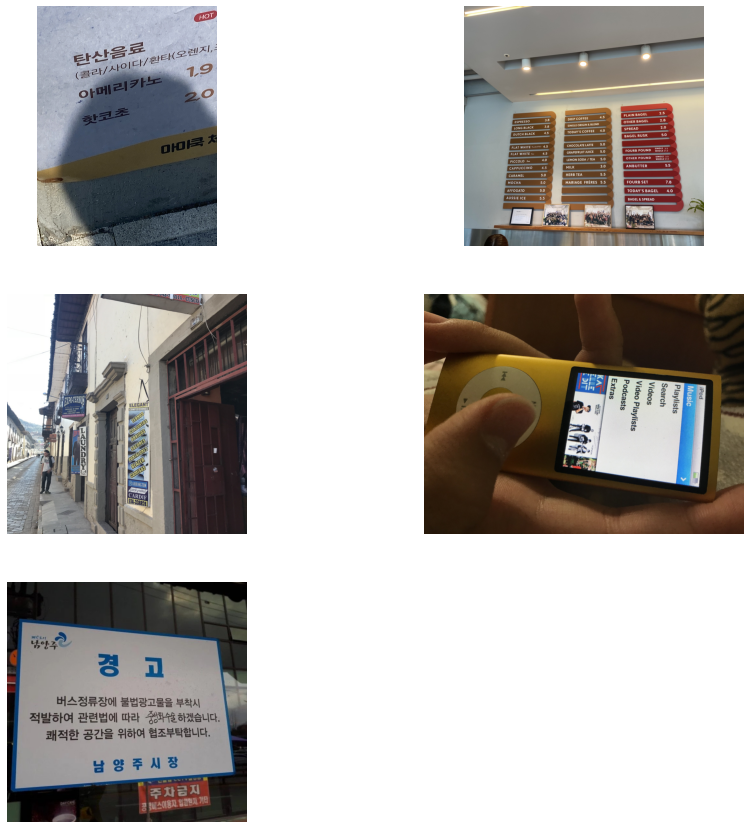

In [7]:
plt.figure(figsize=(15, 15))

for idx, image in enumerate(images_path):
    plt.subplot(3, 2, idx+1)
    im=img.imread(image)
    plt.imshow(im)
    plt.axis('off')

### keras_ocr

In [8]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [9]:
images = [keras_ocr.tools.read(path) for path in images_path]

In [11]:
prediction_groups = [pipeline.recognize([path]) for path in images_path]

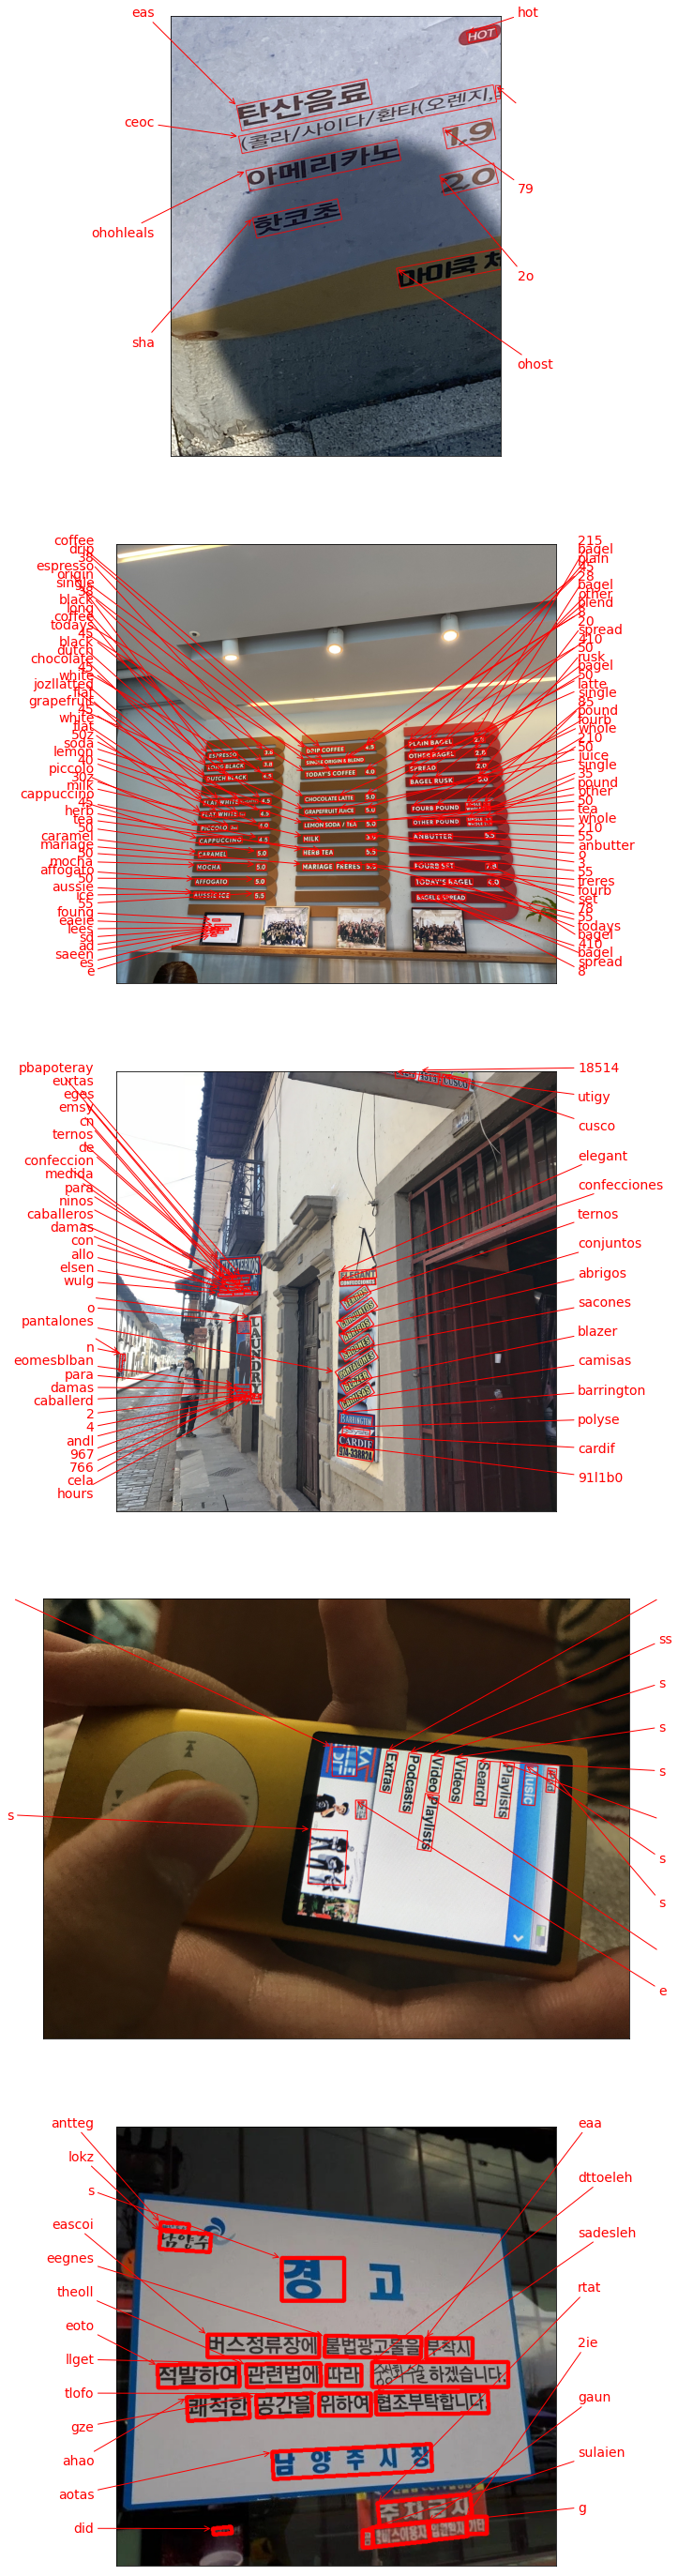

In [15]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 테서렉트

In [17]:
def crop_word_regions(image_path, output_path):
    s = os.path.splitext(image_path)
    s = os.path.split(s[0])
    name = s[1]
    output_path = output_path + name +'/'
    
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 11'
    image = Image.open(image_path)
    img = cv2.imread(image_path)
    
    d = pt.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
#     n_boxes = len(d['text'])
#     for i in range(n_boxes):
#         if int(d['conf'][i]) > 60:
#             (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#             img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     
    top_level = max(d['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(d['level'])):
        level = d['level'][i]
    
        if level == top_level:
            left = d['left'][i]
            top = d['top'][i]
            width = d['width'][i]
            height = d['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return name, cropped_image_path_list, img


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
output_path = work_dir + '/output/'

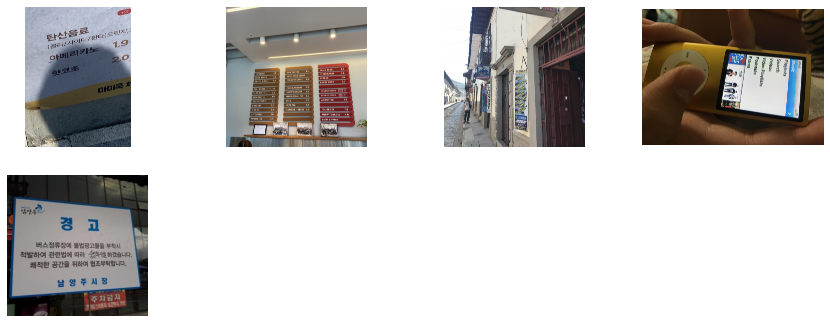

In [18]:
Tesser_dict = {}
img_dict = {}
plt.figure(figsize=(15, 15))

for idx, path in enumerate(images_path):    
    name, cropped_image_path_list, imgs = crop_word_regions(path, output_path)
    Tesser_dict[name] = cropped_image_path_list
    img_dict[name] = imgs
    plt.subplot(5, 4, idx+1)
    plt.imshow(imgs)
    plt.axis('off')

In [19]:
def recognize_images(cropped_image_path_list):
    test = []
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pt.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        test.append(recognized_data['text'].replace('\n', '').replace('\x0c',''))
        
    print(test)
    print("Done")
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

['i', 'aan', 'ee', 'a', 'a', '+ -F', 'Co ™)', 'a', 'ure', '[- 7.', '', 'HAE AIO =', 'ori at}', 'CL «34', '_—', 'eo eee', 'ee', 'At )|', 'ABTS', '+OF', 'pet', 'HOI', 'thet', 'sas', 'ofASUC', 'ay AIst', 'a7tS', 'S\\5+O', 'oa', 'KX CIES', 'ej. 7', '—', 'LIC}.', '— i', 'ee', ':', 'ya', 'My', '', 'as']
Done


In [20]:
data_path = os.getenv('HOME')+'/aiffel/ocr_python/images/'
print(data_path)
print(os.listdir(data_path))

/aiffel/aiffel/ocr_python/images/
['photo_4.jpeg', 'photo_11.jpeg', 'photo_5.jpeg', 'photo_1.jpeg', 'photo_10.jpeg', '.ipynb_checkpoints']


### keras-ocr와 테서렉트 직접 비교

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 7200x7200 with 0 Axes>

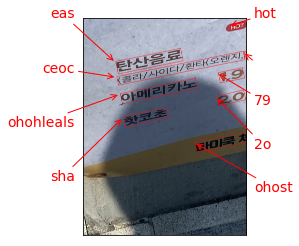

In [21]:
plt.figure(figsize=(100, 100))
a = keras_ocr.tools.drawAnnotations(image=images[0], 
                                    predictions=prediction_groups[0][0])
print(a)

['Tons', 'ate =', '(', 'sii Al,', '—lr', 'st', 'AFC', 'as} /', '419', 'SS', '©O', '', 'i.', 'OD', 've', 'a >', 'at.', 'a', '-', '', 'ets', 'A', 'i.', '', '" 7 aa', '-', '“hv', '\\', '~~', '.', '-_', '', 'e']
Done


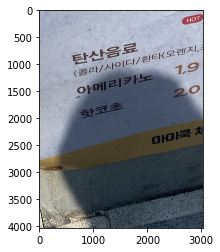

In [24]:
plt.imshow(img_dict['photo_4'])
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(Tesser_dict['photo_4'])

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 7200x7200 with 0 Axes>

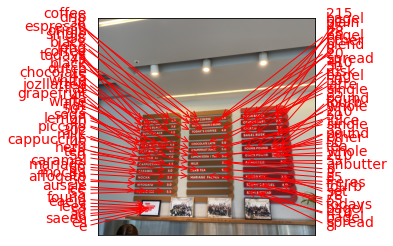

In [25]:
plt.figure(figsize=(100, 100))
a = keras_ocr.tools.drawAnnotations(image=images[1], 
                                    predictions=prediction_groups[1][0])
print(a)

['', '', '—— a ee', '', '|', '—', 'aa', '—', '|)”0ClU Khe', '> —_——l', 'BAGEL', 'y ye.', 'Py:', 'iP COFFEE', '4.5', '2.8', 'ESPRESSO', '|', 'OTHER', 'AGEL', '—', 'os', '—', '—_', '—E—=E————', 'is:', 'SINGLE', 'ORIGIN & BLEND', 'ft:', '. BLEND', '— tC', '| ONG BLACK', 'Fd', 'ye', 'ce', "TODAY'S COFFEE", '4', 'one)', 'DUT', 'BLACK', 'j', 'BAGEL', 'RUS', '', '| irr', '50', 'ELA', 'WaT aed', '45', 'CHOCOLATE LATT', '—', '"=e', 'FOURB', '3)', 'POUND', 'SINGLE 3.5', '', 'WHOLE', 'Inne', '45', 'GRAPEFRUIT', 'JUICE', 'sae', 'a', 'os', '—_', 'way)', 'WHITE 50z', 'in', 'aati', 'SINGLE', 'ae', 'Tt', '2', 'POUND', 'WHOLE', 'rane', 'OO s—‘“—Ss—s—S', '1O 3oz', '40', '—', 'Bayley', 'SOD:', '/ TEA', '45', 'MILK', '3.0', 'CAPPUCCINO', 'at', '—', '—_—', 'ro Fo)', 'a —,', 'CARAMEL', '5.0', 'HERB', 'TEA', '2', '. —', 'MOCHA', '50', 'FOURB', 'SET', '7.8', 'MARIAGE', 'ee', '2', 'AFFOGATO', 'a', '5 O', "TODAY'S", 'BAGEL', '40', '5 45', 'BAGEL', 'a', 'SPREAD', 'WOR', 'ICE', 'eee', '———', 'ee', '', '“2', 'mae'

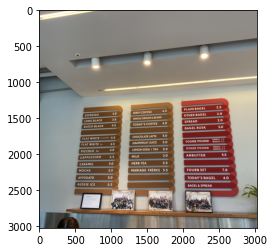

In [26]:
plt.imshow(img_dict['photo_11'])
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(Tesser_dict['photo_11'])

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 7200x7200 with 0 Axes>

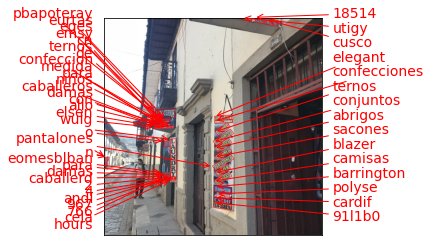

In [27]:
plt.figure(figsize=(100, 100))
a = keras_ocr.tools.drawAnnotations(image=images[2], 
                                    predictions=prediction_groups[2][0])
print(a)

keras는 detection과 recognition을 훌륭하게 수행한다.
반면에, 테서렉트는 recognition 조차 잘하지 못한다.

### 회고

1. 사진에 글자를 잘 읽다니 신기하다.

2. 구글의 keras의 힘의 끝은 과연 어딜까 정말 대단하다.